## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_research = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "left")

complete_research

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
mouse_total = complete_research["Mouse ID"].count()
mouse_total

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupl_mouse_id = complete_research.loc[complete_research.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
# dupl_mouse_id
clean_complete_research = complete_research[complete_research["Mouse ID"].isin(dupl_mouse_id) == False]

clean_complete_research


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the clean DataFrame.
new_mouse_total = clean_complete_research["Mouse ID"].count()
new_mouse_total

1880

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
research_mean = clean_complete_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
research_median = clean_complete_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
research_variance = clean_complete_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
research_sd = clean_complete_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
researchSEM = clean_complete_research.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
research_summary_df = pd.DataFrame({"Mean": research_mean, "Median": research_median, "Variance": research_variance, "Standard Deviation": research_sd,
                                    "SEM": researchSEM})

research_summary_df.head()
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_complete_research.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'std', 'var', 'sem']})

# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar Plots

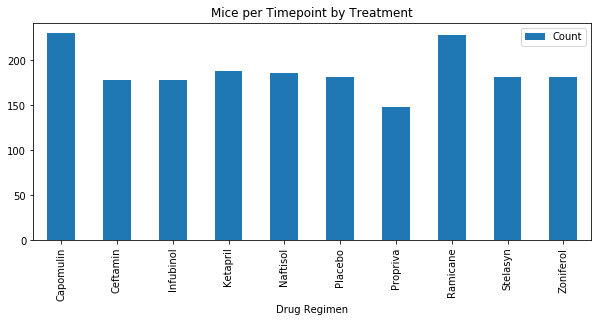

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
complete_research_grouped = pd.DataFrame(clean_complete_research.groupby(["Drug Regimen"]).count()).reset_index()

#Select the parts of data needed to plot the graphs
variables_regimen = complete_research_grouped[["Drug Regimen", "Mouse ID"]]
variables_regimen = variables_regimen.rename(columns = {"Mouse ID" : "Count"})
variables_regimen = variables_regimen.set_index("Drug Regimen")

#Plot using pandas .plot()
variables_regimen.plot(kind = "bar", figsize = (10,4))
plt.title("Mice per Timepoint by Treatment")
plt.show()
plt.tight_layout()

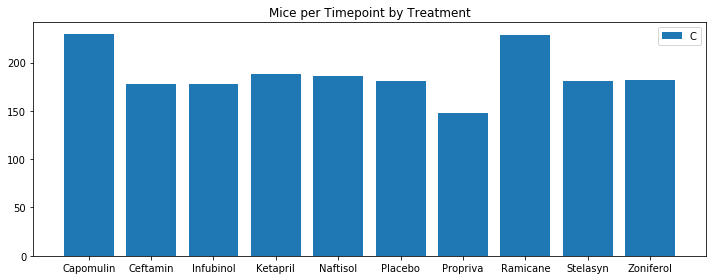

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# Determine column data being used as list for the plotting
research_drug_regimen = research_summary_df.index.tolist()
# research_drug_regimen
# Determine count of values in column and make them a list
count_drug_regimen = (clean_complete_research.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
# count_drug_regimen
#Arrange axis
x_axis = research_drug_regimen
plt.figure(figsize = (10,4))
plt.bar(x_axis, count_drug_regimen, align = "center")
plt.title("Mice per Timepoint by Treatment")
plt.legend("Count")
plt.tight_layout()

## Pie Plots

In [9]:
#data frame categorized by sex(male/female)
mouse_sex = pd.DataFrame(clean_complete_research.groupby(["Sex"]).count()).reset_index()
mouse_sex = mouse_sex[["Sex", "Mouse ID"]]
mouse_sex = mouse_sex.rename(columns = {"Mouse ID": "Count"})
mouse_sex

,Sex,Count
0,Female,922
1,Male,958


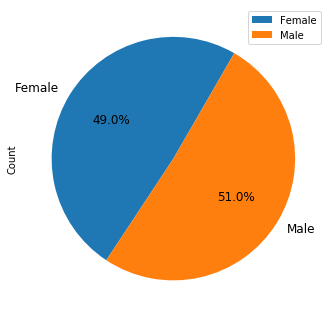

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(12,10))
ax1 = plt.subplot(121, aspect = "equal")
mouse_sex.plot(kind = 'pie', y = "Count", ax=ax1, autopct = '%1.1f%%', startangle = 60, shadow = False, labels = mouse_sex["Sex"], fontsize = 12)


In [11]:
plt.close()

In [12]:
# pyplot
# Determine and convert needed columns to a list
mouse_sex_pp = (clean_complete_research.groupby(["Sex"])["Age_months"].count()).tolist()
mouse_sex_pp

[922, 958]

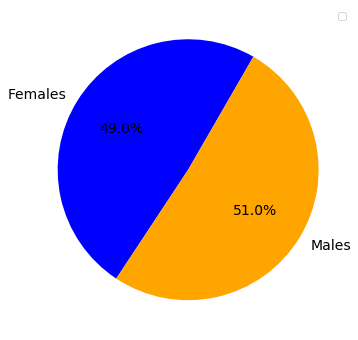

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate variables used for pie graph
sex = ["Females", "Males"]
colors = ["blue", "orange"]
plt.figure(figsize=(8,6))
plt.legend(sex)
plt.pie(mouse_sex_pp, labels = sex, colors = colors, autopct = "%1.1f%%", shadow = False, startangle = 60, textprops={'fontsize': 14})
plt.show()


In [14]:
plt.close()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine the best drug regiments (Ramicane, Infubinol, Camopulin and Ceftamin) and organizing the data
drug_regimens_best = clean_complete_research[clean_complete_research["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
drug_regimens_best = drug_regimens_best.sort_values(["Timepoint"], ascending = True)
clean_drug_regimens = drug_regimens_best[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
clean_drug_regimens

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


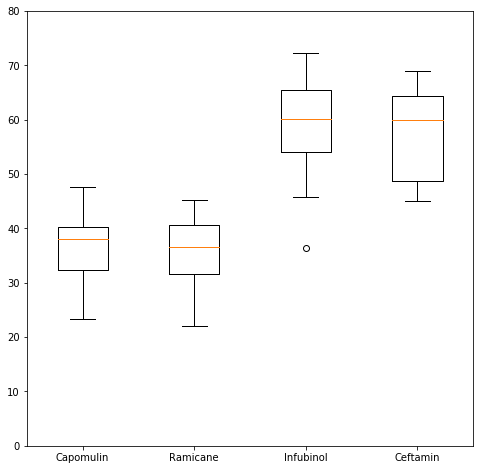

In [16]:
drug_regimens_best_sort = clean_drug_regimens.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
# drug_regimens_best_sort

# Organize results into a new data frame
drug_df_regimens = drug_regimens_best_sort.to_frame()

# List top 4 performers (Drug regimes)
BEST = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_regimes_final = drug_df_regimens.reset_index()
tumor_volume_list = drug_regimes_final.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_volume_list_df = pd.DataFrame(tumor_volume_list)
tumor_volume_list_df = tumor_volume_list_df.reindex(BEST)
volumes = [vol for vol in tumor_volume_list_df["Tumor Volume (mm3)"]]
plt.figure(figsize = (8,8))
plt.boxplot(volumes, labels=BEST)
plt.ylim(0,80)
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Timepoint Vs. Tumor Volume (ID#m957)')

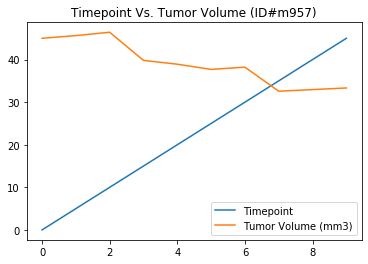

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tp_vs_tv = clean_complete_research[clean_complete_research["Mouse ID"].isin(["m957"])]
timepoint_vs_volume = tp_vs_tv[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Plot line graph 
line_graph_df = timepoint_vs_volume.reset_index()
line_graph_plot = line_graph_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
linegraph = line_graph_plot.plot.line()
plt.title("Timepoint Vs. Tumor Volume (ID#m957)")


Text(0.5, 1.0, 'Weight (g) Vs. Tumor Volume (mm3)')

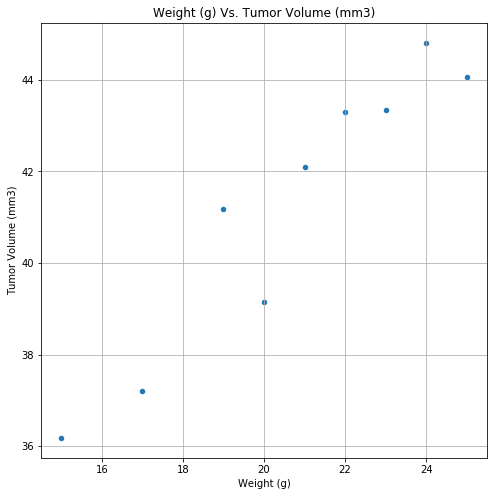

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
w_vs_avg = clean_complete_research[clean_complete_research["Drug Regimen"].isin(["Capomulin"])]
w_vs_avg_df = drug_regimens_best[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
w_vs_avg_df_sorted = w_vs_avg_df.sort_values(["Weight (g)"], ascending = True)
weight_vs_volume_plot = w_vs_avg.reset_index()
weight_vs_volume_mean = weight_vs_volume_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
weight_vs_volume_plot_df = pd.DataFrame(weight_vs_volume_mean).reset_index()

w_vs_avg = weight_vs_volume_plot_df.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", grid = True, figsize = (8,8))
plt.title("Weight (g) Vs. Tumor Volume (mm3)")




## Correlation and Regression

In [19]:
# Calculate the correlation coefficient between mouse weight and average tumor volume (capomulin regime)
corr = round(st.pearsonr(w_vs_avg_df["Weight (g)"], w_vs_avg_df["Tumor Volume (mm3)"])[0], 2)
print(f"The correlation between mouse and weight and average tumor volume is {corr}")


The correlation between mouse and weight and average tumor volume is 0.71


In [20]:
# Regression Model 
reg_model = st.linregress(w_vs_avg_df["Weight (g)"], w_vs_avg_df["Tumor Volume (mm3)"])
reg_model

LinregressResult(slope=1.3083485862058681, intercept=15.60999026310602, rvalue=0.7123108649742889, pvalue=5.640373705170019e-127, stderr=0.045240659003457744)

In [21]:
# linear regression data
reg_model_intercept = 15.60999026310602
reg_model_slope = 1.3083485862058681


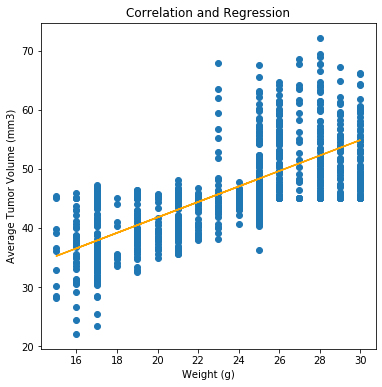

In [22]:
# Plotting results
values = w_vs_avg_df["Weight (g)"] * reg_model_slope + reg_model_intercept
plt.figure(figsize = (6,6))
plt.scatter(w_vs_avg_df["Weight (g)"], w_vs_avg_df["Tumor Volume (mm3)"])
plt.plot(w_vs_avg_df["Weight (g)"], values, color = "orange")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("linearregression")
plt.title("Correlation and Regression")
plt.show()